In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [28]:
import cv2 as cv
import matplotlib.pyplot as plt #pip install matplotlib


In [29]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pbt'
print('load')

load


In [30]:
model = cv.dnn_DetectionModel(frozen_model,config_file)


In [21]:
classLabels = []## empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())
print(classLabels)    

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [31]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5))## mobilenet =>[-1,1]
model.setInputSwapRB(True)##

<dnn_Model 0000012BFDF28D50>

In [32]:
#read an image
img = cv2.imread('ml1.png')

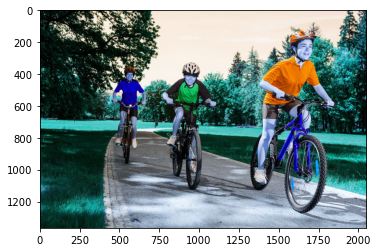

In [33]:
plt.imshow(img)## bgr

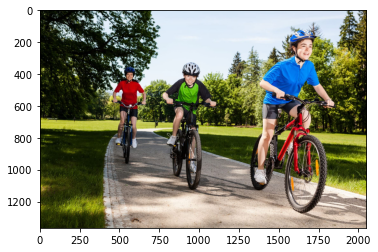

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [34]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)
print(ClassIndex)

[1 1 2 1 2 2 2 2]


In [40]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
#et_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
   cv2.rectangle(img,boxes,(255, 0, 0), 2)
   cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=6)



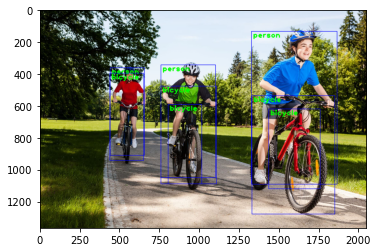

In [41]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [44]:
#video demo
cap = cv2.VideoCapture("Road traffic video for object recognition.mp4")
#check if the video is opened correctly
if not cap.isOpened():
 cap = cv2.VideoCapture(0)
if not cap.isOpened():
 raise IDError("cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN


while True:
    ret,frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.50)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3)
    cv2.imshow('Object detection',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break



cap.release()
cv2.destroyAllWindows()

[3 3 3 3 3 3 3 6 3 8 8 3 3 8 3]
[3 3 3 3 3 3 6 3 3 8 3 3 3]
[3 3 3 3 3 3 3 3 6 8 3 3 8]
[3 3 3 3 3 3 6 3 8 3 3 8 8 3 3]
[3 3 3 3 3 3 6 8 8 3 3 3 3 3 6]
[3 3 3 3 3 3 3 6 3 8 8 3 3 8]
[3 3 3 3 3 6 3 3 8 3 3]
[3 3 3 3 6 3 3 3 3 8 8 3]
[3 3 3 3 3 3 6 3 3 8 3 3 8 3]
[3 3 3 3 3 3 3 3 6 3 3 8 3 3 8]
[3 3 3 3 3 3 3 3 3 8 6 3 3 3 3]
[3 3 3 3 3 3 3 8 3 3 3 3 8 3]
[3 3 3 3 3 8 3 3 3 3 3 3 3 3 8 6]
[3 3 3 3 3 8 3 3 3 3 3 3 3 8 3]
[3 3 3 3 3 3 8 3 3 8 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 8 3 3 8 3 3 8 8 3]
[3 3 3 3 3 3 3 3 3 3 3 8 8 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 8 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 8 3]
[3 3 3 3 3 3 3 3 3 3 3 8 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 8 8]
[3 3 3 3 3 3 3 3 3 3 3 3 3 8]
[3 3 3 3 3 3 3 3 3 3 3 3 3 8]
[3 3 3 3 3 3 3 8 8 3 3 3 3 8]
[3 3 3 3 3 3 8 3 3 8 3 3 3 3]
[3 3 3 3 3 3 3 8 3 3 8 3 3 8 3]
[3 3 3 3 3 3 3 3 8 3 8 3 3 3]
[3 3 3 3 3 3 3 3 3 3 8 3 3 8 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 8]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 6]
[3 3 3 3 3 3 3 3 3 3 3 3 3 8]
[3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3

[3 3 3 3 3 3 3 3 3 6 3 3 3 3 3 3 8 3 3 3]
[3 3 3 3 3 3 3 3 6 3 3 3 3 3 3 8 3 3 3 8]
[3 3 3 3 3 3 3 3 3 3 3 6 3 8 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 6 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 6 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 6]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 6 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 6 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 6 3 3 3 8]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 6 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 6 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 6 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 6 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 6 3 3 8 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 6 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 8]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 8]
[3 3 3 3 3 3 3 3 3 3

KeyboardInterrupt: 

In [46]:
#video demo
cap = cv2.VideoCapture(1)
#check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")



font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN



while True:
    ret,frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3)

    cv2.imshow('Object detection',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break



cap.release()
cv2.destroyAllWindows()

[38 38 38]
[38 38]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 90]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 90]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


KeyboardInterrupt: 